In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [ ]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [ ]:
df.shape

(10000, 14)

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [ ]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [ ]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [ ]:
df.drop(columns= ['RowNumber', 'CustomerId' , 'Surname'], inplace= True)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df = pd.get_dummies(df, columns= ['Geography', 'Gender'], drop_first= True)

In [ ]:
X = df.drop(columns= ['Exited'])
y = df['Exited']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 1)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input

In [ ]:
model = Sequential([
    Input(shape= (11, )),
    Dense(11, activation= 'relu'),
    Dense(11, activation= 'relu'),
    Dense(1, activation= 'sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss= 'binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs= 100, validation_split= 0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5898 - loss: 0.6569 - val_accuracy: 0.8000 - val_loss: 0.4765
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7941 - loss: 0.4697 - val_accuracy: 0.8119 - val_loss: 0.4400
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7984 - loss: 0.4489 - val_accuracy: 0.8231 - val_loss: 0.4199
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8205 - loss: 0.4165 - val_accuracy: 0.8363 - val_loss: 0.4028
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8308 - loss: 0.4002 - val_accuracy: 0.8444 - val_loss: 0.3874
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8400 - loss: 0.3861 - val_accuracy: 0.8475 - val_loss: 0.3752
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8548 - loss: 0.3660 - val_accuracy: 0.8494 - val_loss: 0.3679
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8490 - loss: 0.3673 - val_accu

In [ ]:
model.layers[1].get_weights()

[array([[ 2.37745568e-01,  2.64741600e-01, -9.95863318e-01,
         -1.32222489e-01, -3.94686580e-01, -5.58502853e-01,
         -1.71914801e-01, -2.27494091e-01,  6.81770295e-02,
         -3.06007773e-01,  1.50957294e-02],
        [ 1.79252952e-01,  7.68051803e-01, -7.07437992e-02,
          6.18170910e-02,  5.06653905e-01,  4.19811666e-01,
         -2.30813280e-01, -6.67264462e-01,  2.96349019e-01,
         -3.20048511e-01,  3.03287446e-01],
        [ 3.19162190e-01,  7.86586404e-02, -5.84997416e-01,
          2.86418349e-01, -5.14769197e-01,  4.12210941e-01,
         -9.94754061e-02, -2.63239592e-01, -8.93473551e-02,
          4.52486515e-01, -3.14281851e-01],
        [-3.56779665e-01, -2.42439657e-01,  4.03571397e-01,
          1.60965398e-01, -7.39253581e-01,  9.06929746e-02,
          6.42946243e-01, -8.52674916e-02,  1.35909483e-01,
          7.65886128e-01, -2.86456823e-01],
        [-5.19056559e-01,  2.14240223e-01,  1.45383224e-01,
         -1.74061671e-01,  6.85039461e-01, -

In [ ]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
y_pred = np.where(y_log > 0.5, 1, 0)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8655

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
history.history

{'accuracy': [0.7242187261581421,
  0.8045312762260437,
  0.8123437762260437,
  0.8253124952316284,
  0.8356249928474426,
  0.8451562523841858,
  0.8498437404632568,
  0.8506249785423279,
  0.8518750071525574,
  0.8542187213897705,
  0.8559374809265137,
  0.8564062714576721,
  0.8582812547683716,
  0.8592187762260437,
  0.8600000143051147,
  0.8590624928474426,
  0.8609374761581421,
  0.8615624904632568,
  0.8615624904632568,
  0.8621875047683716,
  0.8615624904632568,
  0.8621875047683716,
  0.864062488079071,
  0.8629687428474426,
  0.862500011920929,
  0.864062488079071,
  0.8628125190734863,
  0.8637499809265137,
  0.8645312786102295,
  0.8653125166893005,
  0.8631250262260437,
  0.8629687428474426,
  0.8637499809265137,
  0.8648437261581421,
  0.8637499809265137,
  0.8634374737739563,
  0.8654687404632568,
  0.8657812476158142,
  0.8650000095367432,
  0.8651562333106995,
  0.8659374713897705,
  0.8653125166893005,
  0.8628125190734863,
  0.8653125166893005,
  0.8637499809265137,
 

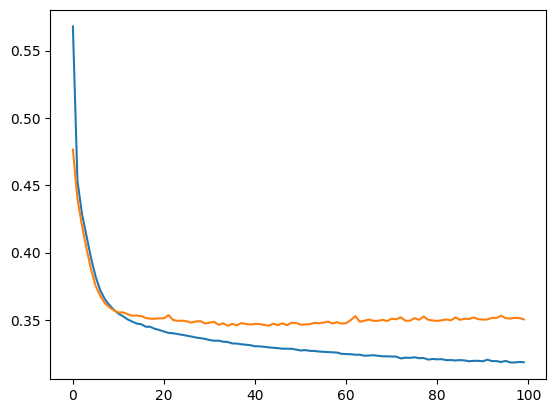

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

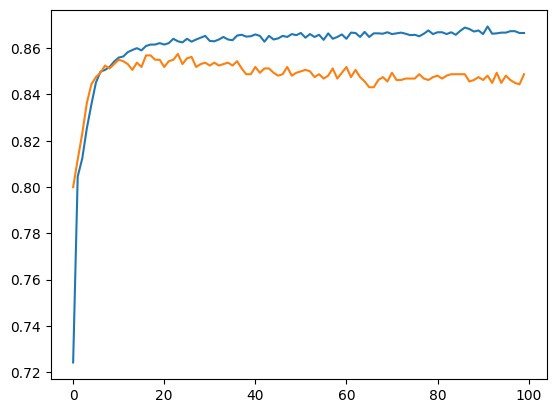

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])